In [89]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [91]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [92]:
print("\nColumn names in the dataset:")
df.columns


Column names in the dataset:


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [93]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [94]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [95]:
# Split the data into features (X) and target (y)
X = df.drop('MEDV', axis=1)  # 'MEDV' is assumed to be the target
y = df['MEDV']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [97]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [98]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [99]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print("\nTraining set predictions (first 5 rows):")
df_train.head()


Training set predictions (first 5 rows):


,Actual,Predicted
220,26.7,32.816273
71,21.7,22.448102
240,22.0,28.037662
6,22.9,23.757332
417,10.4,6.509474


In [100]:
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\nTest set predictions (first 5 rows):")
df_test.head()


Test set predictions (first 5 rows):


,Actual,Predicted
329,22.6,26.175296
371,50.0,22.647476
219,23.0,29.145629
403,8.3,11.529712
78,21.2,21.653121


In [101]:
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse_train}")
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")

Train MSE: 20.019115913036593
Test MSE: 34.987389544238766


In [102]:
# Calculate R² (Coefficient of Determination)
r2_train = lm.score(X_train, y_train)
print(f"Train R²: {r2_train}")
r2_test = lm.score(X_test, y_test)
print(f"Test R²: {r2_test}")

Train R²: 0.7648785387755529
Test R²: 0.5703296053895559


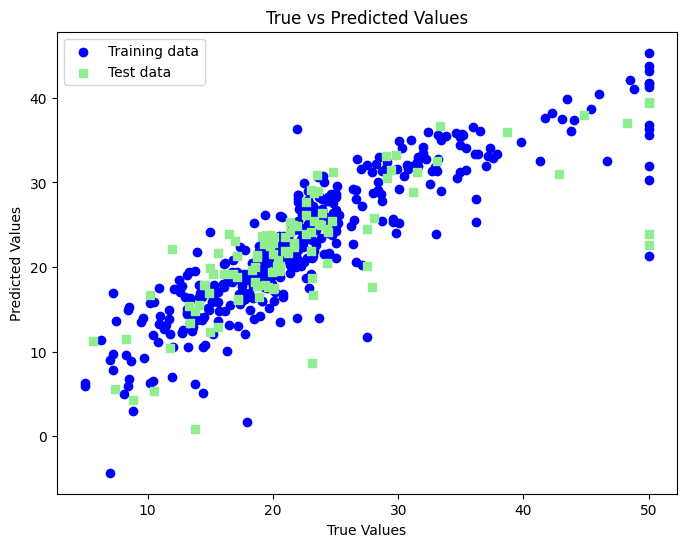

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test_pred, c='lightgreen', marker='s', label='Test data')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()